# Test of stuff exported from Mathematica for case "MatrixElementExport" of CryoTriple2B2W4B4W4W

## Preliminaries

In [6]:
import sys
sys.path.append("/Users/t.seetharamu.1/Documents/svn/GCIF/GCIF planning/Infrastructure cryogenics/CryoTriple2B2W4B4W4W_LUB/MatrixElementExport/MathematicaMatrixElementsCalc")

### Other system dependencies

In [8]:
import os

In [9]:
from math import pi,sqrt

In [10]:
import numpy as np

In [11]:
# import scipy.linalg

In [12]:
import control as ct

In [112]:
import os
import pandas as pd
import inspect
from math import pi,sqrt
from decimal import Decimal

import numpy as np

# import scipy.linalg
from matplotlib.ticker import MultipleLocator
import control as ct

import matplotlib.pyplot as plt
import importlib

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 18          # Default font size for text
plt.rcParams['axes.titlesize'] = 22     # Font size for axes titles
plt.rcParams['axes.labelsize'] = 18     # Font size for axes labels
plt.rcParams['xtick.labelsize'] = 14    # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 14    # Font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 15    # Font size for legend


## CryoTriple2B2W4B4W4B4W model definition data and matrix element functions exported from Mathematica 

In [162]:
print (tpmodel.stdcoeffs)

# Call the pend function with the extracted values
pend = tpmodel.pendSS(*[getattr(tp, coeff) for coeff in tpmodel.stdcoeffs])


['g', 'm1', 'm2', 'm3', 'I1x', 'I1y', 'I1z', 'I1xy', 'I1yz', 'I1zx', 'I2x', 'I2y', 'I2z', 'I2xy', 'I2yz', 'I2zx', 'I3x', 'I3y', 'I3z', 'I3xy', 'I3yz', 'I3zx', 'dtop', 'd0', 'd1', 'd2', 'd3', 'd4', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'si', 'sl', 'kbuz', 'kblz', 'l1', 'l2', 'l3', 'kw1', 'kw2', 'kw3', 'Y1', 'Y2', 'Y3', 'M11', 'M21', 'M31']


In [187]:

n3 = 0.0405
def reboot_params():
    importlib.reload(tp)
    tp.n3 = 0.0405
    tp.n4 = n3
    tp.n5 = n3
    revised_sus_length = 0.298
    tp.kw1= 1396.07
    tp.kw2=tp.kw1
    tp.kw3=70520.4
    tp.l1 = revised_sus_length
    tp.l2 = revised_sus_length
    tp.l3 = revised_sus_length

    
    
def original_params():
    importlib.reload(tp)
    revised_sus_length = 0.298


    data =     [["Masses", "m1 / m2 / m3", [round(tp.m1,2) ,round(tp.m2,2) ,round(tp.m3,2)]],

    ["Roll Moment of Inertia", "I1,x / I2,x / I3,x",  [round(i,5) for i in [tp.I1x, tp.I2x , tp.I3x]]],

    ["Pitch Moment of Inertia", "I1,y / I2,y / I3,y",  [round(i,5) for i in [tp.I1y, tp.I2y , tp.I3y]]],

    ["Yaw Moment of Inertia", "I1,z / I2,z / I3,z", [round(i,5) for i in [tp.I1z, tp.I2z , tp.I3z]]],
    
            ["Stretched wire lengths", "l1 / l2 / l3", [tp.l1 , tp.l2, tp.l3]], 
            ["Upper end wire vertical attachment distance", "dtop / d1/ d3 " , [round(i,3) for i in [tp.dtop, tp.d1 , tp.d3]]],
            ["Bottom end wire vertical attachment distance", "d0 / d2 / d4" , [round(i,3) for i in [tp.d0 , tp.d2, tp.d4]]],
            
            ["Longitudinal wire separation" , "su / si / sl", [0, tp.si , tp.sl]],
            ["Upper transverse wire separation", "n0 / n2 / n4 ", [tp.n0, tp.n2 , tp.n4]],
            ["Bottom transverse wire separation", "n1 / n3 / n5 ", [tp.n1, tp.n3 , tp.n5]],
            ["Vertical Spring stiffness", "kbuz / kbiz / kblz", [tp.kbuz, "NA", tp.kblz]],
            ["Wire Lengths", "l1 / l2 / l3", [tp.l1 , tp.l2 , tp.l3]],
            ["Youngs Moduli of the wires", "Y1 / Y2 / Y3", ['%.5E' % Decimal(tp.Y1), '%.5E' % Decimal(tp.Y2), '%.5E' % Decimal(tp.Y3)]]]



    params = pd.DataFrame(data, columns = ["Description", "Parameter","Values"])
    # Setting display options
    pd.set_option('display.width', 1000)  # Set width to a large value to prevent wrapping
    pd.set_option('display.max_colwidth', None)  # Display full contents of each cell without truncation
    print(params)
    
def print_modes(eigens):
    Hz = eigens[0]
    evecs = eigens[1]
    dofs = []
    dof_amps = []
    for j in range(0,18): 
        df =pd.DataFrame(np.array(list(zip(tpmodel.allvars,list(evecs[j])))), columns=["DOF","Amp"])
        df["Amp"] = [(round(float(i),2)) for i in list(df["Amp"])] 
        df = (df[df["Amp"]!=0])
        df = df.sort_values(by='Amp', ascending=False, key=abs)
        dofs.append(np.array(df["DOF"]))
        dof_amps.append(np.array(df["Amp"]))
        
    modes = pd.DataFrame({"Freq":Hz, "DOF":dofs, "Amps":dof_amps})
    
    def calculate_ratio(row):
        dof = row['DOF']
        amps = row['Amps']
        
        # Identify the mode type from the first entry
        mode = dof[0].rstrip('123')
        
        # Find indices of first and third occurrences for the identified mode
        first_idx = next((i for i, d in enumerate(dof) if d.startswith(mode + '1')), None)
        third_idx = next((i for i, d in enumerate(dof) if d.startswith(mode + '3')), None)
        
        # Calculate the ratio if both indices are found
        if first_idx is not None and third_idx is not None:
            return amps[first_idx] / amps[third_idx] if amps[third_idx] != 0 else None
        return None

    # Apply the function and create a new column
    modes['Mode_vis'] = modes.apply(calculate_ratio, axis=1)

# # Display the updated dataframe
# display(df)
    return modes
        
#         print (Hz[0])
def mode_forest(mode_amp, fig=None, ax = None):
    Hz = mode_amp[0]
    evecs = mode_amp[1]
    dofs = []
    dof_amps = []
    for j in range(0,18): 
        df =pd.DataFrame(np.array(list(zip(tpmodel.allvars,list(evecs[j])))), columns=["DOF","Amp"])
        df["Amp"] = [np.abs(round(float(i),2)) for i in list(df["Amp"])] 
        df = (df[df["Amp"]!=0])
        df = df.sort_values(by='Amp', ascending=False)
        dofs.append(np.array(df["DOF"]))
        dof_amps.append(np.array(df["Amp"]))
        
    
    
        if any(df["DOF"].iloc[i] in ["x1", "x2", "x3", "pitch1", "pitch2", "pitch3"] and df["Amp"].iloc[i] > 0.1 for i in range(len(df))):
            ax.scatter(Hz[j],"Long-pitch Mode", c= "red")
            ax.text(Hz[j] + 0.1,"Long-pitch Mode", str(round(Hz[j],3)), fontsize=10)  # Adjust 0.1 to position the text appropriately
        elif any(df["DOF"].iloc[j] in ["y1", "y2", "y3","roll1", "roll2", "roll3"] and df["Amp"].iloc[j] > 0.1 for j in range(len(df))):
            ax.scatter(Hz[j],"Trans-roll Mode", c = "blue")
            ax.text(Hz[j] + 0.1,"Trans-roll Mode", str(round(Hz[j],3)), fontsize=15)
        elif any(df["DOF"].iloc[j] in ["z1", "z2", "z3"] and df["Amp"].iloc[j] > 0.1 for j in range(len(df))):
            ax.scatter(Hz[j],"Bounce Mode", c = "black")    
            ax.text(Hz[j] + 0.1,"Bounce Mode", str(round(Hz[j],3)), fontsize=15)
        elif any(df["DOF"].iloc[j] in ["yaw1", "yaw2", "yaw3"] and df["Amp"].iloc[j] > 0.1 for j in range(len(df))):
            ax.scatter(Hz[j],"Yaw Mode", c = "green")    
            ax.text(Hz[j] + 0.1,"Yaw Mode", str(round(Hz[j],3)), fontsize=15)
#         elif any(df["DOF"].iloc[j] in ["pitch1", "pitch2", "pitch3"] and df["Amp"].iloc[j] > 0.5 for j in range(len(df))):
#             ax.scatter(Hz[j],"Pitch", c = "cyan")
#             ax.text(Hz[j] + 0.1,"Pitch", str(round(Hz[j],3)), fontsize=15)
#         elif any(df["DOF"].iloc[j] in ["roll1", "roll2", "roll3"] and df["Amp"].iloc[j] > 0.5 for j in range(len(df))):
#             ax.scatter(Hz[j],"Roll", c = "brown")
#             ax.text(Hz[j] + 0.1,"Roll", str(round(Hz[j],3)), fontsize=15)
        ax.grid()
        ax.set_ylabel("Modes", fontsize = 20)
        ax.set_xlabel("Freq (Hz)", fontsize = 20)
        ax.tick_params(axis = "both", labelsize = 15)
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        
    modes = pd.DataFrame({"Freq":Hz, "DOF":dofs, "Amps":dof_amps})
        
    return fig, ax
         



def changes(mutation):
    reboot_params()
    for name, value in zip(mutation.iloc[:, 0], mutation.iloc[:, 1]):
        locals()[name] = value
    # print(mutation)
    # print(d2)
    revised_sus_length = 0.298
    tp.kw1= 1396.07
    tp.kw2=tp.kw1
    tp.kw3=70520.4
    tp.l1 = revised_sus_length
    tp.l2 = revised_sus_length
    tp.l3 = revised_sus_length
    #Some constraints 
    global n3
    n3 = 0.0405
    n4 = n3
    n5 = n3
    d = [d2, d3 , d4]
    s = [su, si, sl]
    if any(i>26.5e-3 for i in d)==True:
        print ("d is not practical")
    if any(i>28.5e-3 for i in s)== True:
        print ("s is not practical")
        
    def assign_to_tp(mutation, tp):
        for index, row in mutation.iterrows():
            string = row['Parameters']
            value = row['Values']
            # Dynamically set the attribute to the corresponding value
            setattr(tp, string, value)

# Call the function
    assign_to_tp(mutation, tp)
    # this seems to have a global imapct and i am not able to print out the original parameters again 
    # tp.d0 = d0  
    # tp.d1 = d1
    # tp.d2 = d2
    # tp.d3 = d3
    # tp.d4 = d4
    # tp.n0 = n0 
    # tp.n1 = n1 
    # tp.n2 = n2
    # tp.su = su
    # tp.si = si
    # tp.sl = sl
    # tp.n3 = n3
    # tp.n4 = n4
    # tp.n5 = n3 
    
    
    
    pend = tpmodel.pendSS(*[getattr(tp, coeff) for coeff in tpmodel.stdcoeffs])
    (Hz,evecs) = tpmodel.eigenmodes(*[getattr(tp, coeff) for coeff in tpmodel.stdcoeffs])
    mode_amp = (Hz,evecs)
    
    data =     [["Masses", "m1 / m2 / m3", [round(tp.m1,2) ,round(tp.m2,2) ,round(tp.m3,2)]],

    ["Roll Moment of Inertia", "I1,x / I2,x / I3,x",[round(i,5) for i in [tp.I1x, tp.I2x , tp.I3x]]],

    ["Pitch Moment of Inertia", "I1,y / I2,y / I3,y", [round(i,5) for i in [tp.I1y, tp.I2y , tp.I3y]]],

    ["Yaw Moment of Inertia", "I1,z / I2,z / I3,z",  [round(i,5) for i in [tp.I1z, tp.I2z , tp.I3z]]],
    
            ["Stretched wire lengths", "l1 / l2 / l3", [tp.l1 , tp.l2, tp.l3]], 
            ["Upper end wire vertical attachment distance", "dtop / d1/ d3 " , [round(i,3) for i in [tp.dtop, tp.d1 , tp.d3]]],
            ["Bottom end wire vertical attachment distance", "d0 / d2 / d4" , [round(i,3) for i in [tp.d0 , tp.d2, tp.d4]]],
            
            ["Longitudinal wire separation" , "su / si / sl", [0, tp.si , tp.sl]],
            ["Upper transverse wire separation", "n0 / n2 / n4 ", [tp.n0, tp.n2 , tp.n4]],
            ["Bottom transverse wire separation", "n1 / n3 / n5 ", [tp.n1, tp.n3 , tp.n5]],
            ["Vertical Spring stiffness", "kbuz / kbiz / kblz", [tp.kbuz, "NA", tp.kblz]],
            ["Wire Lengths", "l1 / l2 / l3", [tp.l1 , tp.l2 , tp.l3]],
            ["Youngs Moduli of the wires", "Y1 / Y2 / Y3", ['%.5E' % Decimal(tp.Y1), '%.5E' % Decimal(tp.Y2), '%.5E' % Decimal(tp.Y3)]]]


    params = pd.DataFrame(data, columns = ["Description", "Parameter","Values"])
    # Setting display options
    pd.set_option('display.width', 1000)  # Set width to a large value to prevent wrapping
    pd.set_option('display.max_colwidth', None)  # Display full contents of each cell without truncation
    return params, pend, mode_amp

# def new_pend(d0,d1,d2,d3,d4,n0,n1,n2,su,si,sl):
#     #Some constraints 
#     global n3
#     n3 = 0.0405
#     n4 = n3
#     n5 = n3
#     d = [d2, d3 , d4]
#     s = [su, si, sl]
#     if any(i>26.5e-3 for i in d)==True:
#         print ("d is not practical")
#     if any(i>28.5e-3 for i in s)== True:
#         print ("s is not practical")
#     tp.d0 = d0  
#     tp.d1 = d1
#     tp.d2 = d2
#     tp.d3 = d3
#     tp.d4 = d4
#     tp.n0 = n0 
#     tp.n1 = n1 
#     tp.n2 = n2
#     tp.su = su
#     tp.si = si
#     tp.sl = sl
#     tp.n3 = n3
#     tp.n4 = n4
#     tp.n5 = n3 
    
    
#     return tpmodel.pendSS(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.su,tp.si,tp.sl,tp.kbuz,tp.kbiz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

def trimio_tf(pend,newinputs,newoutputs):
	'''A function to trim a state space object to have only the specified subsets of inputs and output.'''
	A=pend.A
	B=pend.B
	C=pend.C
	D=pend.D
	oldinputs=pend.input_index
	oldoutputs=pend.output_index
	oldstates=pend.state_index
	newinputlist = []
	for i in range(len(newinputs)):
			newinputlist.append(oldinputs.get(newinputs[i],0))
	newoutputlist = []
	for i in range(len(newoutputs)):
			newoutputlist.append(oldoutputs.get(newoutputs[i],0))
	BB=B[range(len(oldstates))][...,newinputlist]
	CC=C[newoutputlist]
	DD=D[newoutputlist][...,newinputlist]
	return ct.ss2tf(A,BB,CC,DD)


### Parameters exported from Mathematica

In [17]:
import CryoTriple2B2W4B4W4W_MatrixElementExport_triplep as tp

### The stiffness matrix for the floats

In [19]:
qm = tpmodel.qm(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [20]:
qm.shape

(6, 6)

### The coupling matrix between floats and params

In [22]:
cqsm = tpmodel.cqsm(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)


In [23]:
cqsm.shape

(6, 6)

### The coupling matrix between floats and vars

In [25]:
cqxm = tpmodel.cqxm(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [26]:
cqxm.shape

(6, 18)

### The stiffness matrix for the params (raw, then effective)

In [28]:
sm = tpmodel.sm(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [29]:
sm.shape

(6, 6)

In [30]:
smeff = tpmodel.smeff(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [31]:
smeff.shape

(6, 6)

### The coupling matrix between vars and params (raw then effective)

In [33]:
cxsm = tpmodel.cxsm(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [34]:
cxsm.shape

(18, 6)

In [35]:
cxsmeff = tpmodel.cxsmeff(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [36]:
cxsmeff.shape

(18, 6)

### The stiffness matrix for vars (raw, then effective)

In [38]:
xm = tpmodel.xm(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [39]:
xm.shape

(18, 18)

In [40]:
xmeff=tpmodel.xmeff(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [41]:
xmeff.shape

(18, 18)

### The mass matrix

In [43]:
km = tpmodel.km(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [44]:
km.shape

(18, 18)

# Generate state space

## Generate full A, B, C, D matrices

In [47]:
A = tpmodel.A(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [48]:
A.shape

(36, 36)

In [49]:
B = tpmodel.B(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [50]:
B.shape

(36, 24)

In [51]:
C = tpmodel.C(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [52]:
C.shape

(24, 36)

In [53]:
D = tpmodel.D(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [54]:
D.shape

(24, 24)

## Generate full state space object

In [56]:
pend = tpmodel.pendSS(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [57]:
## Try a Bode plot of x00 (support) displacement input to x3 (optic) displacement

In [58]:
pend_x00_x3=tpmodel.trimio(pend,["x00"],["x3"])

TypeError: iter() returned non-iterator of type 'numpy.ndarray'

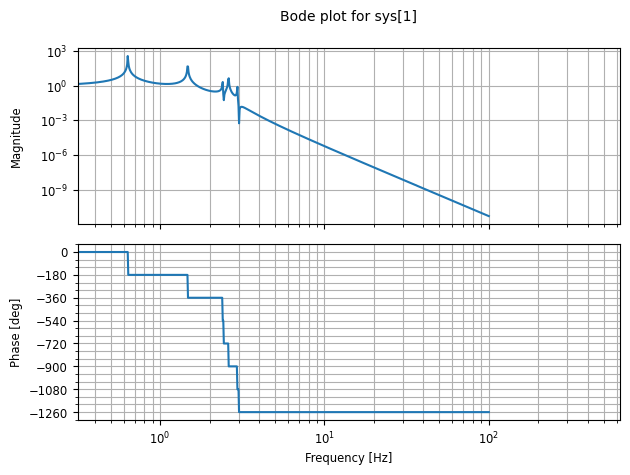

In [59]:
magd,phased,omegad=ct.bode_plot(pend_x00_x3,Hz=True,omega_limits=[1*pi*0.1,2*pi*100])

## Try a Bode plot of x1 (top mass) force input to x3 (optic) displacement

In [ ]:
pend_x1_x3=tpmodel.trimio(pend,["f_x1"],["x3"])

In [ ]:
magf,phasef,omegaf=ct.bode_plot(pend_x1_x3,Hz=True,omega_limits=[0.1*pi*0.1,2*pi*100])

# Eigenmode stuff

In [ ]:
(Hz,evecs) = tpmodel.eigenmodes(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.si,tp.sl,tp.kbuz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

In [ ]:
Hz

## Examine the lowest frequency mode (x and pitch)

In [ ]:
list(zip(tpmodel.allvars,list(evecs[17])))

In [168]:
modes= tpmodel.eigenmodes(*[getattr(tp, coeff) for coeff in tpmodel.stdcoeffs])
print_modes(modes)



,Freq,DOF,Amps,Mode_vis
0,257.147331,"[roll2, roll3]","[0.71, -0.71]",NaN
1,212.494410,"[z2, z3]","[-0.71, 0.71]",NaN
2,36.149688,"[pitch2, pitch3]","[-0.71, 0.71]",NaN
3,7.255479,"[roll1, roll2, roll3]","[-0.87, 0.35, 0.35]",-2.485714
4,5.299131,"[z1, z2, z3]","[0.81, -0.42, -0.42]",-1.928571
5,3.050633,"[yaw1, yaw2, yaw3]","[-0.72, 0.67, -0.17]",4.235294
6,2.939016,"[pitch1, pitch2, pitch3]","[-0.98, 0.13, 0.13]",-7.538462
7,2.539419,"[pitch2, pitch3, pitch1, x2]","[-0.69, -0.69, -0.19, 0.01]",0.275362
8,2.477588,"[roll2, roll3, roll1, y2]","[-0.6, -0.6, -0.53, -0.01]",0.883333
9,2.225696,"[roll2, roll3, roll1, y1, y2, y3]","[0.6, 0.6, 0.51, 0.12, -0.09, 0.02]",0.850000


In [189]:
original_params()
# fig, ax = plt.subplots(figsize = (20,10))
mode_amp = tpmodel.eigenmodes(*[getattr(tp, coeff) for coeff in tpmodel.stdcoeffs])
print_modes(mode_amp)

                                     Description           Parameter                                       Values
0                                         Masses        m1 / m2 / m3                              [1.1, 1.0, 1.0]
1                         Roll Moment of Inertia  I1,x / I2,x / I3,x                  [0.00108, 0.00117, 0.00117]
2                        Pitch Moment of Inertia  I1,y / I2,y / I3,y                   [0.0009, 0.00086, 0.00086]
3                          Yaw Moment of Inertia  I1,z / I2,z / I3,z                  [0.00108, 0.00086, 0.00086]
4                         Stretched wire lengths        l1 / l2 / l3                           [0.25, 0.25, 0.25]
5    Upper end wire vertical attachment distance      dtop / d1/ d3                           [0.0, 0.005, 0.003]
6   Bottom end wire vertical attachment distance        d0 / d2 / d4                        [0.005, 0.003, 0.003]
7                   Longitudinal wire separation        su / si / sl                    

,Freq,DOF,Amps,Mode_vis
0,257.147333,"[roll2, roll3]","[0.71, -0.71]",NaN
1,212.494410,"[z2, z3]","[0.71, -0.71]",NaN
2,36.149706,"[pitch2, pitch3]","[-0.71, 0.71]",NaN
3,7.258412,"[roll1, roll2, roll3]","[-0.87, 0.35, 0.35]",-2.485714
4,5.299131,"[z1, z2, z3]","[-0.81, 0.42, 0.42]",-1.928571
5,3.334969,"[yaw1, yaw2, yaw3]","[0.72, -0.67, 0.17]",4.235294
6,2.947610,"[pitch1, pitch2, pitch3]","[-0.98, 0.14, 0.14]",-7.000000
7,2.605204,"[pitch2, pitch3, pitch1, x1, x2, x3]","[-0.69, -0.69, -0.24, -0.01, 0.01, -0.01]",0.347826
8,2.532277,"[roll2, roll3, roll1, y1, y2, y3]","[0.6, 0.6, 0.54, -0.02, 0.02, -0.01]",0.900000
9,2.401853,"[roll2, roll3, roll1, y1, y2]","[0.6, 0.6, 0.53, 0.04, -0.03]",0.883333


In [ ]:
LeidenData = pd.read_csv(r"/Users/t.seetharamu.1/Documents/svn/GCIF/GCIF planning/Infrastructure cryogenics/CommonPlatformTriple_4B4W_2x4B4W4W/default/stdcalc/Vibrations CS110-2PT_FromLeiden.txt",names=['freq','vert','hor'],sep='\t')

fCryo = LeidenData.freq.values
vertCryo = LeidenData.vert.values
horCryo = LeidenData.hor.values

fig,ax = plt.subplots(figsize = (20,10))
#ax.loglog(seis_freq,xSei*1e-6,'-b',label='X') #convert from um to m
#ax.loglog(seis_freq,ySei*1e-6,'-r',label='Y')
#ax.loglog(seis_freq,zSei*1e-6,'-m',label='Z')

ax.loglog(fCryo,vertCryo*1e-6,'-k',label='Leiden Vertical')
ax.loglog(fCryo,horCryo*1e-6,'-g',label='Leiden Horizontal')
ax.grid(True,which='both')
ax.legend()
ax.set_xlim(1,1000)
#ax.set_ylim(1e-12,1e-4)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Displacement [m/rtHz]')
plt.show()

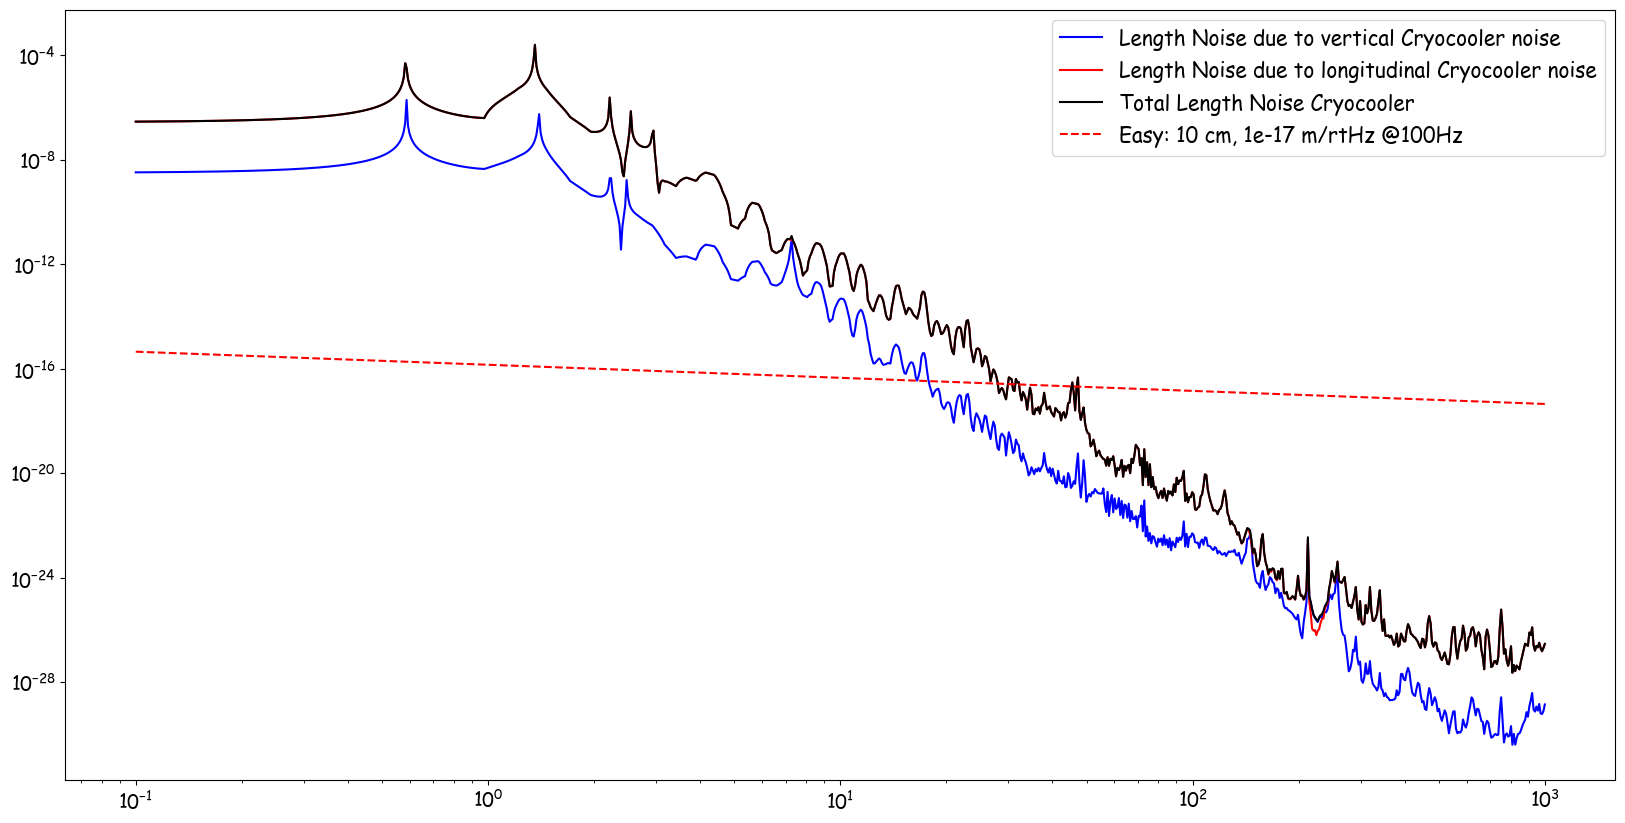

In [226]:
                          
ThermalEasy = 1e-17*np.sqrt(100)/np.sqrt(freq)
tf = trimio_tf(pend,["x00"],["x3"])
mag, phase, omega = ct.frequency_response(tf,omega_limits=[2*pi*0.1,2*pi*1000], Hz = False)
LongcryoInterp = np.interp(freq, fCryo, horCryo)
MirrorLong_CryoLong= LongcryoInterp * mag.transpose()

tf = trimio_tf(pend,["y00"],["y3"])
mag, phase, omega = ct.frequency_response(tf,omega_limits=[2*pi*0.1,2*pi*1000], Hz = False)
vertcryoInterp = np.interp(freq,fCryo, vertCryo)
MirrorVert_CryoVert = vertcryoInterp* mag.transpose()
MirrorLong_CryoVert = 0.01*MirrorVert_CryoVert


fig,ax= plt.subplots(figsize = (20,10))
freq = np.array(omega)/(2*np.pi)
ax.loglog(freq,MirrorLong_CryoVert*1e-6*np.sqrt(2),"-b", label="Length Noise due to vertical Cryocooler noise")
ax.loglog(freq,MirrorLong_CryoLong*1e-6*np.sqrt(2),"-r", label="Length Noise due to longitudinal Cryocooler noise")
ax.loglog(freq,np.sqrt((MirrorLong_CryoLong*1e-6*np.sqrt(2))**2+ (MirrorLong_CryoVert*1e-6*np.sqrt(2))**2 ) ,"-k", label="Total Length Noise Cryocooler")
ax.loglog(freq,ThermalEasy*np.sqrt(2),'--r',label='Easy: 10 cm, 1e-17 m/rtHz @100Hz')
ax.legend()
